In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
file_path = "C:/Users/Nitu Agarwal/Downloads/Clustering_dataset/weatherAUS.csv"
df = pd.read_csv(file_path)

In [38]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)
df.fillna(0, inplace=True)
df.drop(df.select_dtypes(['object']).columns, axis=1, inplace=True)
print(df)
scaler = StandardScaler()
data= scaler.fit_transform(df)
print (pd.DataFrame(data))

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          0.0       0.0           44.0   
1           7.4     25.1       0.0          0.0       0.0           44.0   
2          12.9     25.7       0.0          0.0       0.0           46.0   
3           9.2     28.0       0.0          0.0       0.0           24.0   
4          17.5     32.3       1.0          0.0       0.0           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          0.0       0.0           31.0   
145456      3.6     25.3       0.0          0.0       0.0           22.0   
145457      5.4     26.9       0.0          0.0       0.0           37.0   
145458      7.8     27.0       0.0          0.0       0.0           28.0   
145459     14.9      0.0       0.0          0.0       0.0            0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [48]:
def kmeans(X, k, max_iters=50):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    return centroids, labels

In [49]:
def calculate_sse(X, centroids, labels):
    sse = 0
    for i in range(len(centroids)):
        sse += np.sum((X[labels == i] - centroids[i])**2)
    return sse

In [50]:
def find_optimal_k(X, max_k=10):
    sse_values = []
    for k in range(1, max_k + 1):
        centroids, labels = kmeans(X, k)
        sse = calculate_sse(X, centroids, labels)
        sse_values.append(sse)
    
    return sse_values

In [51]:
def plot_elbow(sse_values):
    plt.plot(range(1, len(sse_values) + 1), sse_values, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSE)')
    plt.show()

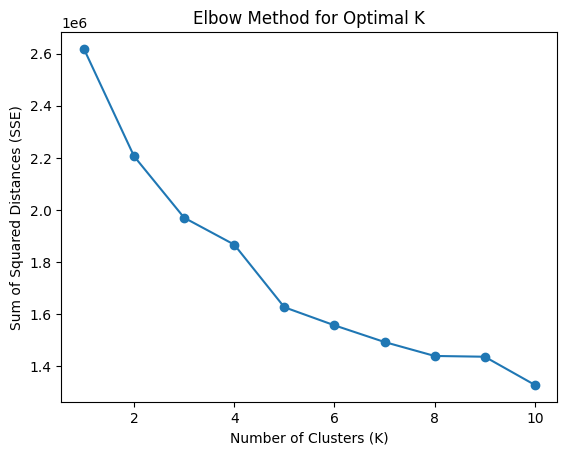

In [52]:
max_clusters = 10
# Corrected the function call
sse_values = find_optimal_k(data, max_k=max_clusters)
plot_elbow(sse_values)

optimal_k = 3

In [54]:
centroids, labels = kmeans(data, optimal_k)


In [55]:
def plot_clusters(X, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title('K-means Clustering (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

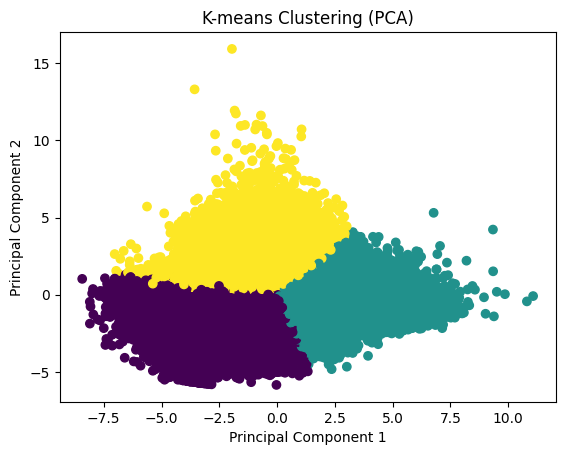

In [57]:
plot_clusters(data, labels)